In [34]:
import intake
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

shot = 30390

cat = intake.open_catalog("catalog.yml")

datasets = []
for channel in range(1, 19):
    print(channel)
    ds = cat.tiny(shot=shot, name=f'xsx/hcam_l_{channel}').read()
    datasets.append(ds)
for channel in range(1, 19):
    print(channel)
    ds = cat.tiny(shot=shot, name=f'xsx/hcam_u_{channel}').read()
    datasets.append(ds)

dataset = xr.combine_nested(datasets, concat_dim='n')

1


/Users/rt2549/miniconda3/envs/data-dash/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/var/folders/xr/yr8z575s52b4tbg3fj65qwx00000gp/T/ipykernel_95765/1861823820.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x:.6f}' for x in ds.time.values])


Text(0.5, 0, 'Time (s)')

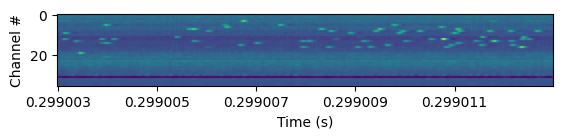

In [91]:
ds = dataset
ds = ds.isel(time=ds.time > .299)
ds = ds.isel(time=ds.time < .2995)
ds['data'].values[ds['data'] > 0.03] = 0

img = ds['data'].values
img = (img - img.min()) / (img.max() - img.min())
img *= 255
img = img.astype(np.uint8)
# 
plt.imshow(ds['data'])
ax = plt.gca()
ax.set_xticklabels([f'{x:.6f}' for x in ds.time.values])
plt.ylabel('Channel #')
plt.xlabel('Time (s)')